## DATA 512 Final Project Analysis
### Natasha Halfin
### Autumn 2020

### Introduction
This Jupyter notebook shows the work I conducted for my final project to address the following research question and hypothesis: 
 
**Research Question**: What factors are associated with countries with greater female representation in politics?  

**Hypothesis**: Countries with better performance across key gender parity indicators are more likely to have greater representation of women in politics.

### Environment Setup
Before beginning the analysis, I will import all necessary libraries and load my datasets.

In [107]:
#Import libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [23]:
os.getcwd()

'c:\\Users\\nahalf\\OneDrive - UW\\UW\\Fall 2020'

In [ ]:
os.setcwd

### Data Dictionary

Definitions from OECD and https://www.genderindex.org/methodology/

Column | Definition 
:--- | :---
Share of Women in Parliament | Percentage of women who make up a country's parliamentary body
Female share of seats on boards of the largest publicly listed companies | Proportion of seats held by women on boards for companies covered by the MSCI ACWI index -- an index of around 2,400 large- and mid-cap firms from developed and emerging countries. 'Board members' refers to either the board of directors for companies in a unitary system, or the supervisory board in the case of a company in a two-tier system, with management and audit boards ommitted.
Share of female managers | Percentage of all managers who are women
Length of Maternity Leave | number of weeks of job-protected leave available for mothers just before and after childbirth.
Access to Financial Services Law | Whether women and men have the same legal rights to open a bank account and obtain credit in a formal financial institution. Values range from 0 to 1 on a 0.25 pt scale. 0 indicates Women and men have the same rights to open a bank account and obtain credit at a formal financial institution, without legal exceptions regarding some groups of women. Customary, religious and traditional laws or practices do not discriminate against women’s above legal rights. 0 indicates that women have the same rights as men  and customs do not discriminate against women’s above legal rights. 1 indicates that women do not have the same rights as men in this regard.
Divorce Law | Whether women and men have the same legal rights to initiate divorce and have the same requirements for divorce or annulment. Values range from 0 to 1 on a 0.25 pt scale. 0 indicates that women have the same rights to initiate divorce as men, without negative repercussions on their parental authority. Customs do not discriminate against women’s rights regarding divorce or parental authority after divorce. 1 indicates that women do not have the same rights as men with respect to initiating and finalizing divorce and experience restricted parental rights after divorce.
Reproductive Autonomy Law | Whether the legal framework protects women’s reproductive health and rights. Values range from 0 to 1 on a 0.25 pt scale. 0 indicates that the country's laws protect women’s reproductive health and rights in case of unwanted pregnancy, without any justifications. 1 indicates that these rights are not protected in the case of unwanted pregnancy.  
Household Responsibilities Attitudes | Percentage of the population agreeing or agreeing strongly that "when a mother works for pay, the children suffer".
Violence Against Women Practices | Percentage of ever-partnered women who ever suffered intimate partner physical and/or sexual violence.




### Part 0: Data Loading, Cleaning, and Preparation

In [35]:
#Load data
df_GIDDB19 = pd.read_csv("data-512-final/Data/Raw Data/GIDDB2019_NH.csv",sep =",")
df_GIDDB14 = pd.read_csv("data-512-final/Data/Raw Data/GIDDB2014_NH.csv",sep =",")
df_EMP = pd.read_csv("data-512-final/Data/Raw Data/GENDER_EMP_2014-2019.csv",sep =",")
df_GIDDB19.head()

,REGION,Region,LOCATION,Country,INC,Income,VAR,Variable,TIME,Year,Value,Flag Codes,Flags
0,ASI,Asia,AUS,Australia,HIN,High income,DF_HR_ATT,Attitudes,2019,2019,21.1,NaN,NaN
1,ASI,Asia,AUS,Australia,HIN,High income,DF_DV_LAW,Law,2019,2019,0.0,NaN,NaN
2,ASI,Asia,AUS,Australia,HIN,High income,RPI_VAW_PRACT,Practice,2019,2019,16.9,NaN,NaN
3,ASI,Asia,AUS,Australia,HIN,High income,RPI_RA_LAW,Law,2019,2019,0.0,NaN,NaN
4,ASI,Asia,AUS,Australia,HIN,High income,RAPFR_SAFS_LAW,Law,2019,2019,0.0,NaN,NaN


In [36]:
df_GIDDB14.head()

,REG,Region,LOCATION,Country,INC,Income group,VAR,Variables,TIME,Time,Value,Flag Codes,Flags
0,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,FC_5,Divorce,2014,2014,1.00,NaN,NaN
1,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,RR_4,Access to financial services,2014,2014,0.50,NaN,NaN
2,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,RC_2_2,Political representation,2014,2014,0.10,NaN,NaN
3,ECA,Europe and Central Asia,HRV,Croatia,HIN,High income: nonOECD,FC_5,Divorce,2014,2014,0.00,NaN,NaN
4,ECA,Europe and Central Asia,HRV,Croatia,HIN,High income: nonOECD,RP_1_2,Prevalence of violence in the lifetime,2014,2014,0.13,NaN,NaN


In [37]:
df_EMP.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,SVN,Slovenia,EMP17,Female share of seats in national parliaments,WOMEN,Women,TOTAL,Total,2014,2014,NaN,NaN,0,Units,NaN,NaN,35.6,NaN,NaN
1,GRC,Greece,EMP17,Female share of seats in national parliaments,WOMEN,Women,TOTAL,Total,2014,2014,NaN,NaN,0,Units,NaN,NaN,21.0,NaN,NaN
2,LUX,Luxembourg,EMP17,Female share of seats in national parliaments,WOMEN,Women,TOTAL,Total,2014,2014,NaN,NaN,0,Units,NaN,NaN,28.3,NaN,NaN
3,SVK,Slovak Republic,EMP17,Female share of seats in national parliaments,WOMEN,Women,TOTAL,Total,2014,2014,NaN,NaN,0,Units,NaN,NaN,18.7,NaN,NaN
4,SWE,Sweden,EMP17,Female share of seats in national parliaments,WOMEN,Women,TOTAL,Total,2014,2014,NaN,NaN,0,Units,NaN,NaN,44.7,NaN,NaN


In [38]:
##clean data##
##part 1: GIDDB dataset
#rename variables to friendly names in df_GIDDB
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['DF_DV_LAW'],'Divorce')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['DF_HR_ATT'],'Household Responsibilities Attitudes')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['RPI_VAW_PRACT'],'Violence Against Women')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['RPI_RA_LAW'],'Reproductive Autonomy')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['RAPFR_SAFS_LAW'],'Access to Financial Services')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['RCL_PV_PRACT'],'Political Representation')

df_GIDDB19.head()


,REGION,Region,LOCATION,Country,INC,Income,VAR,Variable,TIME,Year,Value,Flag Codes,Flags
0,ASI,Asia,AUS,Australia,HIN,High income,Household Responsibilities Attitudes,Attitudes,2019,2019,21.1,NaN,NaN
1,ASI,Asia,AUS,Australia,HIN,High income,Divorce,Law,2019,2019,0.0,NaN,NaN
2,ASI,Asia,AUS,Australia,HIN,High income,Violence Against Women,Practice,2019,2019,16.9,NaN,NaN
3,ASI,Asia,AUS,Australia,HIN,High income,Reproductive Autonomy,Law,2019,2019,0.0,NaN,NaN
4,ASI,Asia,AUS,Australia,HIN,High income,Access to Financial Services,Law,2019,2019,0.0,NaN,NaN


In [39]:
df_GIDDB14['VAR'] = df_GIDDB14['Variables'].replace(['Political representation'],'Political Representation')
df_GIDDB14 = df_GIDDB14.rename(columns={"Time":"Year"})
df_GIDDB14.head()

,REG,Region,LOCATION,Country,INC,Income group,VAR,Variables,TIME,Year,Value,Flag Codes,Flags
0,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,Divorce,Divorce,2014,2014,1.00,NaN,NaN
1,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,Access to financial services,Access to financial services,2014,2014,0.50,NaN,NaN
2,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,Political Representation,Political representation,2014,2014,0.10,NaN,NaN
3,ECA,Europe and Central Asia,HRV,Croatia,HIN,High income: nonOECD,Divorce,Divorce,2014,2014,0.00,NaN,NaN
4,ECA,Europe and Central Asia,HRV,Croatia,HIN,High income: nonOECD,Prevalence of violence in the lifetime,Prevalence of violence in the lifetime,2014,2014,0.13,NaN,NaN


In [40]:
#drop redundant or unneeded columns
df_GIDDB19 = df_GIDDB19[['Country','VAR','Year','Value']]
df_GIDDB19.head()

,Country,VAR,Year,Value
0,Australia,Household Responsibilities Attitudes,2019,21.1
1,Australia,Divorce,2019,0.0
2,Australia,Violence Against Women,2019,16.9
3,Australia,Reproductive Autonomy,2019,0.0
4,Australia,Access to Financial Services,2019,0.0


In [41]:
df_GIDDB14 = df_GIDDB14[['Country','VAR','Year','Value']]
df_GIDDB14.head()

,Country,VAR,Year,Value
0,Bahrain,Divorce,2014,1.00
1,Bahrain,Access to financial services,2014,0.50
2,Bahrain,Political Representation,2014,0.10
3,Croatia,Divorce,2014,0.00
4,Croatia,Prevalence of violence in the lifetime,2014,0.13


In [42]:
#pivot datadrame to create column for each variable/indicator
df_GIDDB19_pivot = pd.pivot_table(df_GIDDB19,values='Value', columns = 'VAR',index = ['Country','Year'])
df_GIDDB19_pivot.head()

,VAR,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation,Reproductive Autonomy,Violence Against Women
Country,Year,,,,,,
Afghanistan,2019,0.25,1.00,NaN,27.7,0.75,60.8
Albania,2019,0.25,0.25,NaN,27.9,0.00,24.6
Algeria,2019,0.25,1.00,75.1,25.8,0.75,NaN
Angola,2019,0.25,0.50,NaN,30.5,0.00,34.8
Antigua and Barbuda,2019,0.25,0.00,NaN,11.1,0.75,NaN


In [43]:
df_GIDDB14_pivot = pd.pivot_table(df_GIDDB14,values='Value', columns = 'VAR',index = ['Country','Year'])
df_GIDDB14_pivot.head()

,VAR,Access to financial services,Divorce,Political Representation,Prevalence of violence in the lifetime,Reproductive autonomy
Country,Year,,,,,
Afghanistan,2014,0.5,1.0,0.28,NaN,0.25
Albania,2014,0.0,0.5,0.18,0.31,0.13
Algeria,2014,0.5,1.0,0.32,NaN,0.10
Angola,2014,0.5,0.0,0.34,0.78,0.27
Argentina,2014,0.0,0.0,0.37,NaN,0.06


In [10]:
#part 2: EMP dataset
#drop unneeded columns
df_EMP = df_EMP[['Country','Indicator','Time','Value']]
df_EMP = df_EMP.rename(columns={"Time":"Year"})
df_EMP.head()

,Country,Indicator,Year,Value
0,Slovenia,Female share of seats in national parliaments,2014,35.6
1,Greece,Female share of seats in national parliaments,2014,21.0
2,Luxembourg,Female share of seats in national parliaments,2014,28.3
3,Slovak Republic,Female share of seats in national parliaments,2014,18.7
4,Sweden,Female share of seats in national parliaments,2014,44.7


In [11]:
#pivot indicators to columns
df_EMP_pivot = pd.pivot_table(df_EMP,values='Value',columns='Indicator',index = ['Country','Year'])
df_EMP_pivot.head()

Indicator       Female share of seats in national parliaments  \
Country   Year                                                  
Australia 2014                                           26.0   
          2015                                           26.7   
          2016                                           28.7   
          2017                                            NaN   
          2018                                            NaN   

Indicator       Female share of seats on boards of the largest publicly listed companies  \
Country   Year                                                                             
Australia 2014                                                NaN                          
          2015                                                NaN                          
          2016                                               26.0                          
          2017                                               28.7                          
          2018                                               31.5                          

Indicator       Length of maternity leave  Share of female managers  
Country   Year                                                       
Australia 2014                        6.0                      36.0  
          2015                        6.0                      37.2  
          2016                        6.0                      36.3  
          2017                        NaN                      38.2  
          2018                        NaN                      37.3

In [44]:
#join GIDDB and EMP datasets
df_join19 = df_EMP_pivot.merge(df_GIDDB19_pivot,how = 'inner',on = ['Country','Year'])
df_join19.head()

,,Female share of seats in national parliaments,Female share of seats on boards of the largest publicly listed companies,Length of maternity leave,Share of female managers,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation,Reproductive Autonomy,Violence Against Women
Country,Year,,,,,,,,,,
Australia,2019,NaN,31.2,NaN,NaN,0.0,0.0,21.1,28.7,0.0,16.9
Austria,2019,NaN,31.3,NaN,NaN,0.0,0.0,58.3,34.4,0.0,13.0
Belgium,2019,NaN,35.9,NaN,NaN,0.0,0.0,32.0,38.0,0.0,24.0
Brazil,2019,NaN,11.9,NaN,NaN,0.0,0.0,60.4,10.7,0.5,33.5
Canada,2019,NaN,29.1,NaN,NaN,0.0,0.0,27.7,27.0,0.0,1.9


I will drop the female share of seats in national parliaments column because it's redundant to the political representation column. I will also drop the length of maternity leave, share of female managers, and female share of seats on boards columns.

In [92]:
df_join19_final = df_join19[['Household Responsibilities Attitudes','Divorce','Political Representation','Reproductive Autonomy','Violence Against Women','Access to Financial Services']]
df_join19_final.head()

,,Household Responsibilities Attitudes,Divorce,Political Representation,Reproductive Autonomy,Violence Against Women,Access to Financial Services
Country,Year,,,,,,
Australia,2019,21.1,0.0,28.7,0.0,16.9,0.0
Austria,2019,58.3,0.0,34.4,0.0,13.0,0.0
Belgium,2019,32.0,0.0,38.0,0.0,24.0,0.0
Brazil,2019,60.4,0.0,10.7,0.5,33.5,0.0
Canada,2019,27.7,0.0,27.0,0.0,1.9,0.0


In [45]:
df_join14 = df_EMP_pivot.merge(df_GIDDB14_pivot,how = 'inner',on = ['Country','Year'])
df_join14.head()

,,Female share of seats in national parliaments,Female share of seats on boards of the largest publicly listed companies,Length of maternity leave,Share of female managers,Access to financial services,Divorce,Political Representation,Prevalence of violence in the lifetime,Reproductive autonomy
Country,Year,,,,,,,,,
Australia,2014,26.0,NaN,6.0,36.0,0.0,0.0,0.26,0.25,NaN
Austria,2014,32.2,17.1,16.0,29.9,0.0,0.0,0.33,0.13,NaN
Belgium,2014,39.3,22.4,15.0,31.3,0.0,0.0,0.38,0.24,0.03
Brazil,2014,9.9,NaN,NaN,37.3,0.5,0.0,0.09,0.31,0.06
Canada,2014,25.1,NaN,17.0,35.4,0.0,0.0,0.25,0.06,NaN


In [72]:
df_join14_final = df_join14[['Female share of seats on boards of the largest publicly listed companies','Length of maternity leave','Share of female managers','Political Representation']]
df_join14_final.head()

,,Female share of seats on boards of the largest publicly listed companies,Length of maternity leave,Share of female managers,Political Representation
Country,Year,,,,
Australia,2014,NaN,6.0,36.0,0.26
Austria,2014,17.1,16.0,29.9,0.33
Belgium,2014,22.4,15.0,31.3,0.38
Brazil,2014,NaN,NaN,37.3,0.09
Canada,2014,NaN,17.0,35.4,0.25


In [73]:
#check how many columns have null values
for column in df_join14_final:
    print(column,df_join14_final[column].isna().sum())

Female share of seats on boards of the largest publicly listed companies 18
Length of maternity leave 10
Share of female managers 0
Political Representation 0


In [93]:
for column in df_join19_final:
    print(column, df_join19_final[column].isna().sum())

Household Responsibilities Attitudes 4
Divorce 0
Political Representation 0
Reproductive Autonomy 0
Violence Against Women 2
Access to Financial Services 0


Given that both datasets have null values, I will created imputed values using the mean value of the column to replace any null values.

In [77]:
#create imputed values for 2014 dataset
board_seats = np.mean(df_join14_final['Female share of seats on boards of the largest publicly listed companies'])
mat_leave = np.mean(df_join14_final['Length of maternity leave'])
df_join14_final['Female share of seats on boards of the largest publicly listed companies'].fillna(board_seats, inplace = True)
df_join14_final['Length of maternity leave'].fillna(mat_leave,inplace=True)
df_join14_final


,,Female share of seats on boards of the largest publicly listed companies,Length of maternity leave,Share of female managers,Political Representation
Country,Year,,,,
Australia,2014,20.1,6.000000,36.0,0.26
Austria,2014,17.1,16.000000,29.9,0.33
Belgium,2014,22.4,15.000000,31.3,0.38
Brazil,2014,20.1,19.238235,37.3,0.09
Canada,2014,20.1,17.000000,35.4,0.25
Chile,2014,20.1,18.000000,26.9,0.14
China (People's Republic of),2014,20.1,19.238235,26.8,0.23
Colombia,2014,20.1,19.238235,56.8,0.12
Costa Rica,2014,20.1,19.238235,31.7,0.39


In [94]:
#create imputed values for 2019 dataset
hh_attitudes = np.mean(df_join19_final['Household Responsibilities Attitudes'])
violence = np.mean(df_join19_final['Violence Against Women'])
df_join19_final['Household Responsibilities Attitudes'].fillna(hh_attitudes, inplace = True)
df_join19_final['Violence Against Women'].fillna(violence,inplace=True)
df_join19_final


,,Household Responsibilities Attitudes,Divorce,Political Representation,Reproductive Autonomy,Violence Against Women,Access to Financial Services
Country,Year,,,,,,
Australia,2019,21.100000,0.00,28.7,0.00,16.900000,0.00
Austria,2019,58.300000,0.00,34.4,0.00,13.000000,0.00
Belgium,2019,32.000000,0.00,38.0,0.00,24.000000,0.00
Brazil,2019,60.400000,0.00,10.7,0.50,33.500000,0.00
Canada,2019,27.700000,0.00,27.0,0.00,1.900000,0.00
Chile,2019,36.000000,0.25,22.6,0.50,6.700000,0.00
China (People's Republic of),2019,42.400000,0.00,24.2,0.00,21.960976,0.00
Colombia,2019,42.400000,0.00,18.7,0.50,37.400000,0.00
Czech Republic,2019,32.500000,0.25,22.0,0.00,21.000000,0.25


Output final datasets for reference.

In [95]:
df_join19_final.to_csv('data-512-final/Data/Transformed Data/WIP2019.csv')
df_join14_final.to_csv('data-512-final/Data/Transformed Data/WIP2014.csv')

### Part 1: Descriptive Analysis to Measure Correlation of Key Gender Parity Indicators to Representation of Women in Politics

#### Exploratory Data Analysis

Looking at the distribution of political representation in 2014, the mean is around 26% representation with a median of 24%. The boxplot illustrates that the distribution is skewed since the 3rd quartile has larger range than the 2nd quartile.

Mean: 0.25977272727272727
Median: 0.24


<AxesSubplot:xlabel='Political Representation'>

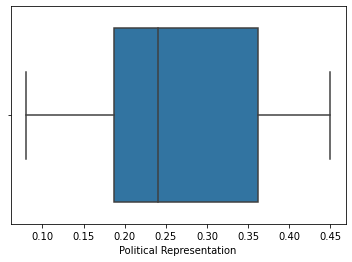

In [214]:
#distributions
print("Mean:",np.mean(df_join14_final['Political Representation']))
print("Median:",np.median(df_join14_final['Political Representation']))
sns.boxplot(df_join14_final['Political Representation'])

When we compare to the 2019 distribution, both the mean and median have increased by several points, and the minimum has shifted slightly upwards as well. Furthermore, the distribution is much more even in 2019.

Mean: 27.686046511627907
Median: 28.0


<AxesSubplot:xlabel='Political Representation'>

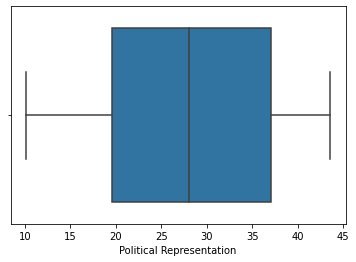

In [215]:
print("Mean:",np.mean(df_join19_final['Political Representation']))
print("Median:",np.median(df_join19_final['Political Representation']))
sns.boxplot(df_join19_final['Political Representation'])

Next, it is helpful to understand how many countries meet the threshold of critical mass (30% representation of women) that I previously defined.

In [ ]:
sns.boxplot(df_join19_final['Political Representation'])

From this pairplot visual, we can assess that the features in the 2014 dataset are unevenly distributed and have loose correlations between each other.

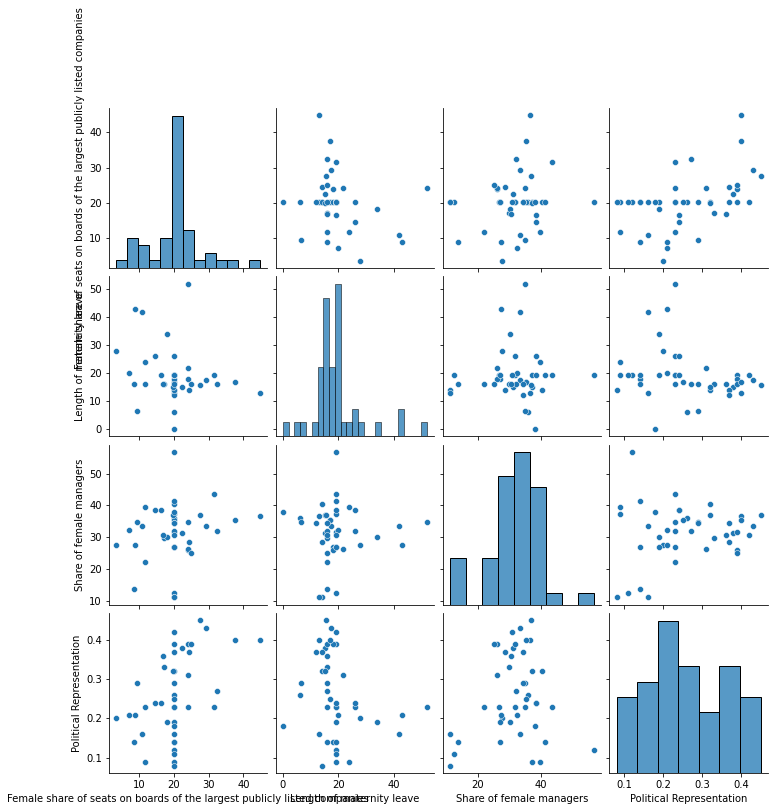

In [217]:
sns.pairplot(df_join14_final)

From this pairplot, we can observe that (better to do individual distributions) the 2019 dataset's features are also unevenly distributed, and contain even more loose or non-existent correlations.

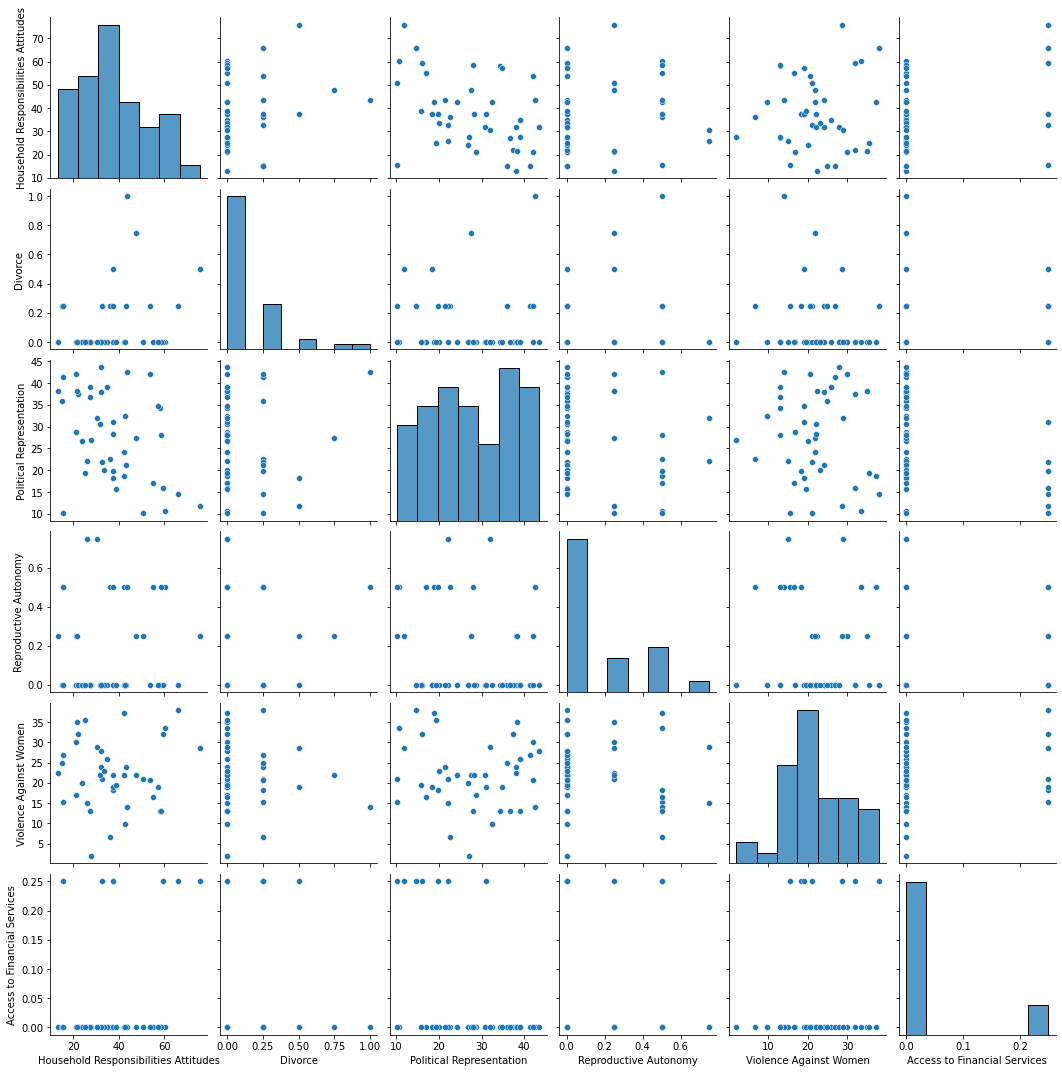

In [216]:
sns.pairplot(df_join19_final)

<AxesSubplot:xlabel='Female share of seats on boards of the largest publicly listed companies', ylabel='Political Representation'>

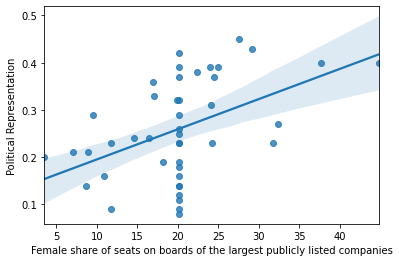

In [87]:
#correlations
# representation in commercial sector
sns.regplot(df_join14_final['Female share of seats on boards of the largest publicly listed companies'],df_join14_final['Political Representation'])

There appears to be some correlation between female share of board seats and political representation.

<AxesSubplot:xlabel='Share of female managers', ylabel='Political Representation'>

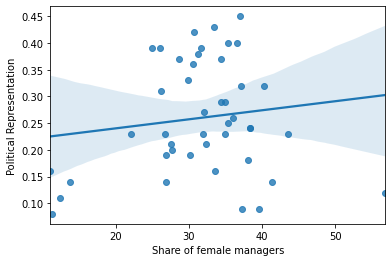

In [89]:
sns.regplot(df_join14_final['Share of female managers'],df_join14_final['Political Representation'])

There appears to be little if any correlation between the ratio of female managers and political representation in a country.

<AxesSubplot:xlabel='Length of maternity leave', ylabel='Political Representation'>

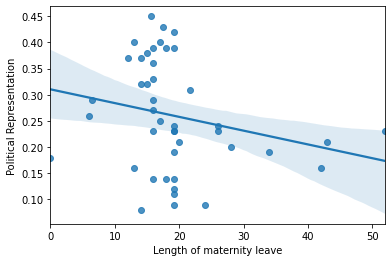

In [90]:
sns.regplot(df_join14_final['Length of maternity leave'],df_join14_final['Political Representation'])

Interestingly (and counter to what I would have expected), there appears to be a loose negative correlation between maternity leave length and political representation. Thus, as the length of maternity leave increases, the lower the ratio of women political representatives.

<AxesSubplot:xlabel='Access to Financial Services', ylabel='Political Representation'>

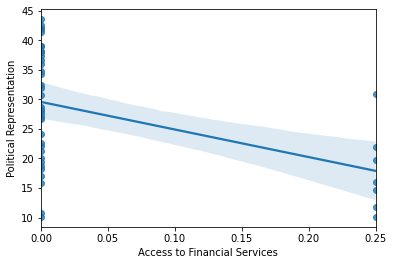

In [98]:
#represent this in a different way; box plot or distribution?
#0 means women and men have exact same access to financial services; 0.25 means technically same rights but may be discrimination still
sns.regplot(df_join19_final['Access to Financial Services'],df_join19_final['Political Representation'])

*Change chart to bar chart or box plot*  
Even though there are 4 possibles values for Access to Financial Services on the 0.25 point scale, all countries had a score of 0 or 0.25. Althougth there is a range of scores for Political Representation between both groups, we can see that the highest rate of political representation is about 12 pts lower in the population with diminished access to financial services (0.25 scores).

<AxesSubplot:xlabel='Divorce', ylabel='Political Representation'>

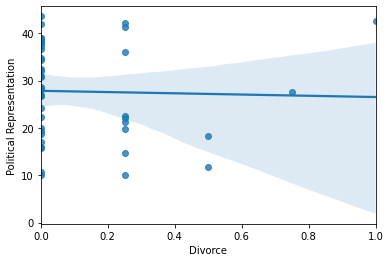

In [100]:
#0: women have same rights as men to initiate divorce; 1: women do not have the same rights as men in divorce
#look into which country has bad divorce laws but high representation of women?
sns.regplot(df_join19_final['Divorce'],df_join19_final['Political Representation'])

There appears to be no correlation between divorce law and political representation.

<AxesSubplot:xlabel='Household Responsibilities Attitudes', ylabel='Political Representation'>

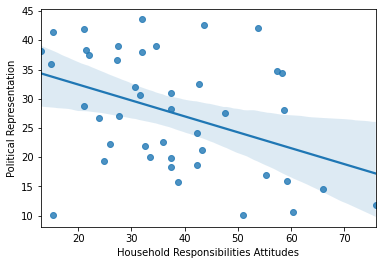

In [101]:
#Percentage of the population agreeing or agreeing strongly that "when a mother works for pay, the children suffer
sns.regplot(df_join19_final['Household Responsibilities Attitudes'],df_join19_final['Political Representation'])

While the general trend is that political representation goes down as more people believe mothers should not work, there is enough spread among the datapoints to question the relationship.

<AxesSubplot:xlabel='Reproductive Autonomy', ylabel='Political Representation'>

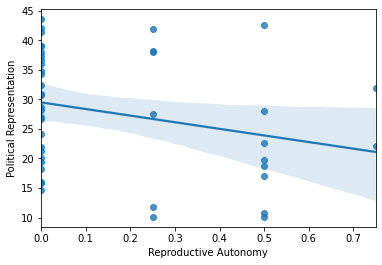

In [102]:
#0: protects reproductive rights;1: does nto protect reproductive rights
sns.regplot(df_join19_final['Reproductive Autonomy'],df_join19_final['Political Representation'])

Within each reproductive autonomy score, 0 being the most favorable to women and 1 being least favorable, there is still a significant spread between rates of political representation. There is a definitely a spread of observations that prevent us from constructing a strong relationship. But one important thing to note i that the highest concentration of observations that are above the critical mass threshold of 30% exist in countries with a reproductive autonomy score of 0.  
### **Add bar chart and/or box plot**

<AxesSubplot:xlabel='Violence Against Women', ylabel='Political Representation'>

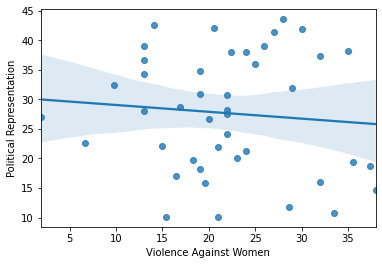

In [103]:
sns.regplot(df_join19_final['Violence Against Women'],df_join19_final['Political Representation'])

There does not seem to be a strong relationship here. Upsettingly, violence against women is pervasive, even in countries with higher representation of women in politics.

### Evaluating Correlation
I am using [the following guidelines](https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c) the measure the strength of correlation:
1–0.8 → Very strong  
0.799–0.6 → Strong  
0.599–0.4 → Moderate  
0.399–0.2 → Weak  
0.199–0 → Very Weak  

In [104]:
corr = df_join19_final.corr()
corr

,Household Responsibilities Attitudes,Divorce,Political Representation,Reproductive Autonomy,Violence Against Women,Access to Financial Services
Household Responsibilities Attitudes,1.000000,0.194229,-0.408797,0.081349,0.072521,0.258917
Divorce,0.194229,1.000000,-0.028625,0.170078,-0.084262,0.198239
Political Representation,-0.408797,-0.028625,1.000000,-0.262863,-0.093581,-0.432020
Reproductive Autonomy,0.081349,0.170078,-0.262863,1.000000,-0.043125,0.029700
Violence Against Women,0.072521,-0.084262,-0.093581,-0.043125,1.000000,0.145540
Access to Financial Services,0.258917,0.198239,-0.432020,0.029700,0.145540,1.000000


The strongest correlation to Political Representation in this dataset lies with Access to Financial Services (-0.432). However, this is still not high enough to state that there is a strong correlation. There does not appear to be multicollinearity amongst the independent variables.

In [105]:
corr2 = df_join14_final.corr()
corr2

,Female share of seats on boards of the largest publicly listed companies,Length of maternity leave,Share of female managers,Political Representation
Female share of seats on boards of the largest publicly listed companies,1.000000,-0.230194,0.186420,0.469044
Length of maternity leave,-0.230194,1.000000,0.017884,-0.231154
Share of female managers,0.186420,0.017884,1.000000,0.139275
Political Representation,0.469044,-0.231154,0.139275,1.000000


The strongest correlation to Political Representation in this dataset group is with the Female Share of Board Seats (0.469). Even then, the strength of the correlation is arguable, since it is below 0.9 or even 0.7 (if we employ a looser threshold for measuring "strong" correlation). There does not appear to be multicollinearity amongst the independent variables.

### Part 2: Linear Regression Model to Predict Representation of Women in Politics

For the sake of simplicity, I will first construct an Ordinary Least Squares regression model for each dataset.

In [124]:
import statsmodels.api as sm
#Split X from Y
x_14 = df_join14_final.drop('Political Representation', axis=1)
x_19 = df_join19_final.drop('Political Representation', axis=1)
y_14 = df_join14_final['Political Representation']
y_19 = df_join19_final['Political Representation']

modelx_14 = sm.add_constant(x_14)
model_14 = sm.OLS(y_14,modelx_14)
results = model_14.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Political Representation   R-squared:                       0.240
Model:                                  OLS   Adj. R-squared:                  0.183
Method:                       Least Squares   F-statistic:                     4.204
Date:                      Fri, 27 Nov 2020   Prob (F-statistic):             0.0112
Time:                              13:23:25   Log-Likelihood:                 43.399
No. Observations:                        44   AIC:                            -78.80
Df Residuals:                            40   BIC:                            -71.66
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------

If we examine the R-squared value, a measure of goodness of fit, we see that it is quite low at 0.24. Additionally, the only variable with a statistically significant p-value (below or equal to 0.05) is the female share of board seats variable. Furthermore, even looking at the weights of the independent variable coefficients, none seem to have a meaningful positive or negative association with the dependent variable, political representation.

Next, let's repeat this exercise for the 2019 dataset.

In [140]:
modelx_19 = sm.add_constant(x_19)
model_19 = sm.OLS(y_19,modelx_19)
results = model_19.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Political Representation   R-squared:                       0.354
Model:                                  OLS   Adj. R-squared:                  0.266
Method:                       Least Squares   F-statistic:                     4.049
Date:                      Fri, 27 Nov 2020   Prob (F-statistic):            0.00496
Time:                              13:33:47   Log-Likelihood:                -150.59
No. Observations:                        43   AIC:                             313.2
Df Residuals:                            37   BIC:                             323.8
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In this regression model, there is improved statistical signficance compared to the 2014 model. Here we see an R-squared value of 0.35 (though this is still low), and larger coefficient values for each independent variable. The two variables with statistically significant p-values are Household Responsibilities Attitudes and Access to Financial Services. 

### Do I need to scale data for OLS model?

Next I will compare the performance of an OLS regression and a ridge regression model trained on the OECD data. Typically, ridge regression performs better than OLS because it adds a penalty on the size of the coefficients with l2 regularization. [insert formulas] and produces less noise. However, I would still like to use OLS as a benchmark.

In [120]:
#Standard Linear Regression prep
#Split X from Y
x_14 = df_join14_final.drop('Political Representation', axis=1)
x_19 = df_join19_final.drop('Political Representation', axis=1)
y_14 = df_join14_final['Political Representation']
y_19 = df_join19_final['Political Representation']

#Train and test split
x_14_train, x_14_test, y_14_train, y_14_test = train_test_split(x_14, y_14, random_state=0)
x_19_train, x_19_test, y_19_train, y_19_test = train_test_split(x_19, y_19, random_state=0)

#Convert DataFrames to arrays
x_14_train = np.array(x_14_train)
x_14_test = np.array(x_14_test)
x_19_train = np.array(x_19_train)
x_19_test = np.array(x_19_test)

#Standardize+Scale
x_14_scaled_train = preprocessing.scale(x_14_train)
x_14_scaled_test = preprocessing.scale(x_14_test)
x_19_scaled_train = preprocessing.scale(x_19_train)
x_19_scaled_test = preprocessing.scale(x_19_test)

In [158]:
#train model on 2014 dataset
from sklearn.linear_model import LinearRegression, Ridge
lm_14 = LinearRegression().fit(x_14_scaled_train,y_14_train)
print(lm_14.intercept_)
print(lm_14.coef_)
print(lm_14.score(x_14_scaled_train,y_14_train))



0.23818181818181816
[ 0.04572394 -0.00823846  0.01328587]
0.25618187287505834


In [218]:
from sklearn.metrics import mean_squared_error
lm_14_test_predictions = lm_14.predict(x_14_scaled_test)
rmse = mean_squared_error(y_14_test,lm_14_test_predictions,squared = False)
mae = mean_squared_error(y_14_test,lm_14_test_predictions,squared = True)
print("RMSE:",rmse,"\nMAE:",mae)


RMSE: 0.11437487260151502 
MAE: 0.013081611482612792


In [219]:
lm_14_train_predictions = lm_14.predict(x_14_scaled_train)
rmse_train = mean_squared_error(y_14_train,lm_14_train_predictions,squared=False)
mae_train = mean_squared_error(y_14_train,lm_14_train_predictions,squared=True)
print(rmse_train,mae_train)


0.08837355614796161 0.007809885426236922


As we might expect, the RMSE of the training set predictions is smaller than for the test set. Based on the test set RMSE, we can deduce that the predictions may estimate the political representation of women incorrectly by a margin of 11.4%. The average error, indicated by the MAE, is much smaller (0.01) than the RMSE, which indicates that there are large errors in the test predictions.
### Is this correct??

In [159]:
#repeat for 2019 dataset
lm_19 = LinearRegression().fit(x_19_scaled_train,y_19_train)
print(lm_19.intercept_)
print(lm_19.coef_)
print(lm_19.score(x_19_scaled_train,y_19_train))

25.1875
[-2.83730283 -1.02418213 -3.36015885 -0.81192144 -2.62896638]
0.4025352104717622


In [220]:
lm_19_train_predictions = lm_19.predict(x_19_scaled_train)
rmse_train2 = mean_squared_error(y_19_train,lm_19_train_predictions,squared=False)
mae_train2 = mean_squared_error(y_19_train,lm_19_train_predictions,squared=True)
print(rmse_train2,mae_train2)

7.374610901188034 54.38488594392139


In [221]:
lm_19_predictions = lm_19.predict(x_19_scaled_test)
rmse_2 = mean_squared_error(y_19_test,lm_19_predictions,squared=False)
mae_2 = mean_squared_error(y_19_test,lm_19_predictions,squared=True)
print(rmse_2,mae_2)
print(lm_19_predictions)
print(y_19_test)

13.800265430601184 190.4473259550461
[29.91331031 23.02112946 14.28879242 30.68016069 29.76793441 24.74487864
 30.15351623 25.10288893 29.72754236 15.07282942 24.58951715]
Country       Year
Norway        2019    41.4
South Africa  2019    42.1
Mexico        2019    42.6
Canada        2019    27.0
Estonia       2019    26.7
Lithuania     2019    21.3
Netherlands   2019    36.0
Finland       2019    42.0
Spain         2019    39.1
Poland        2019    28.0
New Zealand   2019    38.3
Name: Political Representation, dtype: float64


The RMSE for the 2019 dataset is slightly higher than for the 2014 dataset, with a test RMSE of 13.8 indicating that predictions may be up to 14 points away from the actual value.

### measure accuracy, RMSE, etc.

### Ridge Regression
Because the Ridge Regression formula contains a regularization parameter (alpha) that can affect the model's performance, we want to optimize this value. First I will create an array of sample alphas on a logarithmic scale.

In [204]:
alphas_rr = np.logspace(-2,1,5)
print(alphas_rr)

[ 0.01        0.05623413  0.31622777  1.77827941 10.        ]


In [185]:
#repeat other steps
from sklearn.linear_model import RidgeCV
clf_14 = RidgeCV(alphas = alphas_rr).fit(x_14_scaled_train,y_14_train)
print(clf_14.intercept_)
print(clf_14.coef_)
print(clf_14.score(x_14_scaled_train,y_14_train))

0.23818181818181816
[ 0.03526997 -0.0083779   0.01128134]
0.24492164088250934


In [182]:
alpha_14 = clf_14.alpha_
print(alpha_14)

10.0


10 appears to be the optimal alpha value for the 2014 Ridge Regression model, so I will proceed with this one.

In [194]:
rr_14 = Ridge(alpha=alpha_14).fit(x_14_scaled_train,y_14_train)
rr_14.score(x_14_scaled_train,y_14_train)
rr_14_predictions = rr_14.predict(x_14_scaled_test)
rmse_rr = mean_squared_error(rr_14_predictions,y_14_test,squared=False)
print(rmse_rr)

0.1124689365869215


The RMSE for the 2014 dataset is slightly lower (0.15 points) with the Ridge Regression model with a margin of error of 11.25 percentage points.

In [201]:
clf_19 = RidgeCV(alphas = alphas_rr).fit(x_19_scaled_train,y_19_train)
print(clf_19.intercept_)
print(clf_19.coef_)
print(clf_19.score(x_19_scaled_train,y_19_train))

25.1875
[-2.23676403 -1.09822423 -2.54111369 -0.7444869  -2.11414948]
0.38714868963140214


In [206]:
alpha_19 = clf_19.alpha_
print(alpha_19)

10.0


Again, 10 appears to be the optimal alpha value for the 2019 dataset as well.

In [207]:
rr_19 = Ridge(alpha=alpha_19).fit(x_19_scaled_train,y_19_train)
rr_19.score(x_19_scaled_train,y_19_train)
rr_19_predictions = rr_19.predict(x_19_scaled_test)
rmse_rr_2 = mean_squared_error(rr_19_predictions,y_19_test,squared=False)
print(rmse_rr_2)

13.369622630154025


The Ridge Regression model for the 2019 dataset minimizes the RMSE by 0.43 points compared to the OLS model. This RMSE indicates that on average the predictions from the Ridge Regression model may be up to 13.37 points off.

### add more charts and graphics for the modeling sections (plot residuals?)

### Summary
Through both descriptive and predictive analyses, I have explored the relationship between key indicators of gender parity and the representation of women in political bodies. Given the weak correlations exhibited in the descriptive analysis and the poor predictive abilities of multiple regression models, I am unable to support my original hypothesis: [*insert*]

### Data Challenges

Once I began working with the data more closely, I discovered that not all features, even within the same dataset were consistently populated for the same years. Thus, in order to paint the most complete picture possible, I decided to focus on specific features that were available from the 2014 dataset, and focus on other features that were only available in the 2019 dataset. 

Additionally, I encountered null values due to some countries not reporting values for every indicator. Thus, I created imputed values based on the feature's mean.